In [18]:
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt

from verbose import print_state, print_experience, print_buffer, print_shapes, action_available, print_interaction
# from utils import 
from constant import *


from DQN import DQNAgent
from env import Env
from utils_class import EpsilonGreedy


%load_ext autoreload
%autoreload 2


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
sess = InteractiveSession(config=config)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2022-06-07 08:52:36.790501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 08:52:36.790671: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/widium/.conda/envs/tf_gpu/lib/python3.8/site-packages/tensorflow/python/client/session.py:1771: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [19]:
STACK_SIZE = 3
NBR_STACK = 2

env = Env(STACK_SIZE)
strategy = EpsilonGreedy(MIN_EPSILON, START_EPSILON, DECAY)
agent = DQNAgent(NBR_STACK, STACK_SIZE, len(env.action_space()))

In [20]:
print_state(env)

---State t---
-A-	-B-
___________	
|17.0	nan|
|87.0	nan|
|57.0	nan|
___________	
------------
Env : in progress
------------


=== Actions available ===
rotate_a
inverse_rotate_a
swap_a
push_b
---State t---
-A-	-B-
___________	
|17.0	nan|
|87.0	nan|
|57.0	nan|
___________	
------------
Env : in progress
------------
----------------------------------
Action [rotate_a]
Reward [-1]
----------------------------------
=== Actions available ===
rotate_a
inverse_rotate_a
swap_a
push_b
---State t---
-A-	-B-
___________	
|57.0	nan|
|17.0	nan|
|87.0	nan|
___________	
------------
Env : in progress
------------
----------------------------------
Action [swap_a]
Reward [99]
----------------------------------
---State t---
-A-	-B-
___________	
|17.0	nan|
|57.0	nan|
|87.0	nan|
___________	
------------
Env : done
------------


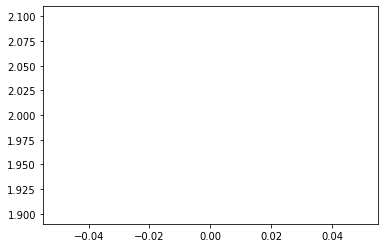

In [21]:
episode_durations = list()
for episode in range(EPISODE):
    
    # env.reset(STACK_SIZE)
    state = env.get_state()
    
    timesteps = 0
    while (1):
        
        action_available(env)
        print_state(env)
        timesteps += 1
        
        exploration_rate = strategy.get_exploration_rate(timesteps)
        
        action = env.choose_action(state, agent.policy_model, exploration_rate)
        reward = env.reward()
        next_state = env.get_state()
        print_interaction(action, reward)
        
        
        
        experience = env.create_experience(state, action, next_state, reward)
        env.replaymemory.push(experience)
        state = next_state
        
        # print_experience(experience)
        # print("==== Dehors ===")
        if env.replaymemory.can_provide_sample(BATCH_SIZE):
            print("======== START TRAIN ========")
            
            buffer = env.replaymemory.get_sample(BATCH_SIZE)
            # print_buffer(buffer)
            
            states, actions, next_states, rewards, dones = env.replaymemory.extract_value(buffer)
            # print_shapes(states, next_states)
            agent.train(states, next_states, buffer)
        
        # print(f"Env : {env.state()}")
        if (env.state() == 'done'):
            print_state(env)
            episode_durations.append(timesteps)
            plt.plot(episode_durations)
            break
            
    
    

In [10]:
print_buffer(buffer)

========== BUFFER ==========
---State t---		---State t+1---
-A-	-B-		-A-	-B-
___________		___________
|nan	7.0|		|nan	7.0|
|nan	90.0|		|nan	90.0|
|nan	0.0|		|nan	0.0|
___________		___________
----------------------------------
	Action [rotate_a]
	Reward [-10]
----------------------------------
---State t---		---State t+1---
-A-	-B-		-A-	-B-
___________		___________
|nan	7.0|		|nan	7.0|
|nan	90.0|		|nan	90.0|
|nan	0.0|		|nan	0.0|
___________		___________
----------------------------------
	Action [swap_a]
	Reward [-5]
----------------------------------
---State t---		---State t+1---
-A-	-B-		-A-	-B-
___________		___________
|nan	7.0|		|nan	7.0|
|nan	90.0|		|nan	90.0|
|nan	0.0|		|nan	0.0|
___________		___________
----------------------------------
	Action [push_b]
	Reward [-5]
----------------------------------
---State t---		---State t+1---
-A-	-B-		-A-	-B-
___________		___________
|nan	7.0|		|nan	7.0|
|nan	90.0|		|nan	90.0|
|nan	0.0|		|nan	0.0|
___________		___________
----------------

In [6]:
env.replaymemory.get_sample(4)

[Experience(state=array([[nan, 13., 27., 84., 58., 93., 67., 35., 11., 71.],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, 26.]], dtype=float32), action=1, next_state=array([[13., 27., 84., 58., 93., 67., 35., 11., 71., 26.],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32), reward=-6),
 Experience(state=array([[13., 27., 84., 58., 93., 67., 35., 11., 71., 26.],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32), action=0, next_state=array([[nan, 13., 27., 84., 58., 93., 67., 35., 11., 71.],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, 26.]], dtype=float32), reward=-1),
 Experience(state=array([[13., 27., 84., 58., 93., 67., 35., 11., 71., 26.],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32), action=0, next_state=array([[nan, 13., 27., 84., 58., 93., 67., 35., 11., 71.],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, 26.]], dtype=float32), reward=-6),
 Experience(state=array([[nan, 

In [7]:
env.replaymemory.print_history(BATCH_SIZE)

Actions : 0 	 Reward : -1
Actions : 1 	 Reward : -6
Actions : 0 	 Reward : -6
Actions : 0 	 Reward : -1
